In [1]:
#핫플레이스 예측(영업기간, 폐업기간, 세대수, 유동인구 등)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [3]:
#강남구 세대수 2016-01~2020-06까지있으므로 6월까지만 
df = pd.read_csv('./강서구_시계열데이터.csv', index_col=0)
print(df.head())
print(df.info())
print(df.tail())

                              세대수  신설기업          유동인구         영업기간  \
2016-01-01 00:00:00.000  240337.0  72.0   8746.230645  3762.914616   
2016-02-01 00:00:00.000  240337.0  66.0   9753.158621  3766.710458   
2016-03-01 00:00:00.000  240337.0  94.0  10847.164516  3774.608391   
2016-04-01 00:00:00.000  241192.0  73.0  10853.098333  3768.538531   
2016-05-01 00:00:00.000  241192.0  75.0  10681.298387  3766.699783   

                                폐업기간  
2016-01-01 00:00:00.000  2793.881356  
2016-02-01 00:00:00.000  1716.507692  
2016-03-01 00:00:00.000  2589.487805  
2016-04-01 00:00:00.000  2935.436364  
2016-05-01 00:00:00.000  2231.100000  
<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2016-01-01 00:00:00.000 to 2020-09-01 00:00:00.100
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   세대수     54 non-null     float64
 1   신설기업    57 non-null     float64
 2   유동인구    57 non-null     float64
 3   영업기간    57 non-

In [4]:

df.drop(['세대수'], axis='columns', inplace=True)
df = df.dropna(axis=0) #결측치 제거 2016~2020.06
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 2016-01-01 00:00:00.000 to 2020-09-01 00:00:00.000
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   신설기업    57 non-null     float64
 1   유동인구    57 non-null     float64
 2   영업기간    57 non-null     float64
 3   폐업기간    57 non-null     float64
dtypes: float64(4)
memory usage: 2.2+ KB
None


In [5]:
df.tail()

,신설기업,유동인구,영업기간,폐업기간
2020-05-01 00:00:00.000,127.0,8587.411674,3831.231763,1876.354430
2020-06-01 00:00:00.000,142.0,9303.599049,3843.838710,1653.642857
2020-07-01 00:00:00.000,166.0,9595.984663,3853.300558,1888.560000
2020-08-01 00:00:00.000,131.0,8338.758833,3876.246888,2045.561644
2020-09-01 00:00:00.000,135.0,8063.417460,3906.246888,1923.252033


In [6]:
df.reset_index(inplace=True)
df.rename(columns={"index":"날짜"}, inplace=True)
df

,날짜,신설기업,유동인구,영업기간,폐업기간
0,2016-01-01 00:00:00.000,72.0,8746.230645,3762.914616,2793.881356
1,2016-02-01 00:00:00.000,66.0,9753.158621,3766.710458,1716.507692
2,2016-03-01 00:00:00.000,94.0,10847.164516,3774.608391,2589.487805
3,2016-04-01 00:00:00.000,73.0,10853.098333,3768.538531,2935.436364
4,2016-05-01 00:00:00.000,75.0,10681.298387,3766.699783,2231.100000
5,2016-06-01 00:00:00.000,76.0,10703.723333,3753.306354,2344.329670
6,2016-07-01 00:00:00.000,85.0,10294.572581,3753.661748,2354.051948
7,2016-08-01 00:00:00.000,61.0,10229.574194,3764.513433,2132.441176
8,2016-09-01 00:00:00.000,79.0,10170.561667,3769.764364,3220.480519
9,2016-10-01 00:00:00.000,82.0,10705.258065,3771.518024,2380.041096


In [7]:
#날짜 형태로 변환 

In [8]:
#날짜를 시간 자료형 datetime으로 변환 

df['날짜'] = pd.to_datetime(df['날짜']) #날짜 열에 덮어 씌워짐 
df.set_index('날짜', inplace=True) #날짜 열을 인덱스로 설정 ->그래야 인덱싱할 수 있으므로 
print(df.head())

            신설기업          유동인구         영업기간         폐업기간
날짜                                                      
2016-01-01  72.0   8746.230645  3762.914616  2793.881356
2016-02-01  66.0   9753.158621  3766.710458  1716.507692
2016-03-01  94.0  10847.164516  3774.608391  2589.487805
2016-04-01  73.0  10853.098333  3768.538531  2935.436364
2016-05-01  75.0  10681.298387  3766.699783  2231.100000


In [9]:
#전체 년도 다 

In [10]:
data = df[['신설기업','유동인구','영업기간', 
                                              '폐업기간']]
print(data.head()) 
print(data.tail()) 
print(data.info()) 
print(data.shape) 

            신설기업          유동인구         영업기간         폐업기간
날짜                                                      
2016-01-01  72.0   8746.230645  3762.914616  2793.881356
2016-02-01  66.0   9753.158621  3766.710458  1716.507692
2016-03-01  94.0  10847.164516  3774.608391  2589.487805
2016-04-01  73.0  10853.098333  3768.538531  2935.436364
2016-05-01  75.0  10681.298387  3766.699783  2231.100000
             신설기업         유동인구         영업기간         폐업기간
날짜                                                      
2020-05-01  127.0  8587.411674  3831.231763  1876.354430
2020-06-01  142.0  9303.599049  3843.838710  1653.642857
2020-07-01  166.0  9595.984663  3853.300558  1888.560000
2020-08-01  131.0  8338.758833  3876.246888  2045.561644
2020-09-01  135.0  8063.417460  3906.246888  1923.252033
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2016-01-01 to 2020-09-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   신

c:\users\023\anaconda3\envs\machinelearning\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\023\anaconda3\envs\machinelearning\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\023\anaconda3\envs\machinelearning\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\023\anaconda3\envs\machinelearning\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\023\anaconda3\envs\machinelearning\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\023\anaconda3\envs\ma

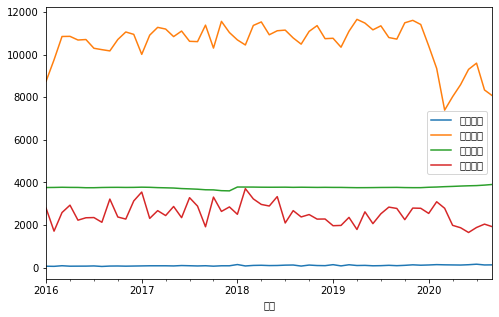

In [11]:
data.plot(figsize = (8,5))

In [12]:
#스케일링 minmax 최소0 최대 1

In [13]:
from sklearn.preprocessing import MinMaxScaler


In [14]:
minmaxscaler = MinMaxScaler()
scaled_data = minmaxscaler.fit_transform(data)
print(scaled_data[:6])
print(scaled_data.shape)

[[0.1047619  0.31781667 0.5230787  0.55427875]
 [0.04761905 0.55434598 0.53570892 0.03055908]
 [0.31428571 0.81133006 0.56198836 0.45492147]
 [0.11428571 0.81272393 0.54179162 0.62308974]
 [0.13333333 0.77236779 0.5356734  0.28070638]
 [0.14285714 0.77763545 0.49110834 0.3357482 ]]
(57, 4)


In [15]:
#시계열 자료로 만들어야하므로 28개짜리로 reshape 


#세대수는 세대수끼리 28개, 유동인구는 유동인구끼리 같은 컬럼끼리 묶어서 28개씩 5개를 만들어야 시계열자료가 됨

#세로로 한줄의 형태가 들어가야함 

In [16]:
sequence_X= []
sequence_Y= []
for i in range(0, len(scaled_data) - 28): #28개씩 묶어서 학습 
    _x = scaled_data[i:i+28] #i에서부터 i 5 이전까지 인덱싱 (1,2,3,4,5) 
    _y = scaled_data[i+28][2] #5개 중 종가만 맞추는거 -> 인덱싱 3번 
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x) 
    sequence_Y.append(_y)



[[0.1047619  0.31781667 0.5230787  0.55427875]
 [0.04761905 0.55434598 0.53570892 0.03055908]
 [0.31428571 0.81133006 0.56198836 0.45492147]
 [0.11428571 0.81272393 0.54179162 0.62308974]
 [0.13333333 0.77236779 0.5356734  0.28070638]
 [0.14285714 0.77763545 0.49110834 0.3357482 ]
 [0.22857143 0.68152516 0.49229087 0.34047428]
 [0.         0.66625691 0.52839858 0.23274757]
 [0.17142857 0.65239475 0.54587043 0.76165191]
 [0.2        0.77799596 0.55170553 0.3531078 ]
 [0.12380952 0.86098335 0.53828994 0.30590678]
 [0.18095238 0.83458838 0.54588974 0.71987821]
 [0.23809524 0.61421288 0.57662327 0.92197647]
 [0.2952381  0.82584359 0.55581714 0.3210895 ]
 [0.2952381  0.91181163 0.50649313 0.49806271]
 [0.2952381  0.89308857 0.47650504 0.38603938]
 [0.22857143 0.80999339 0.44288289 0.59289721]
 [0.4        0.87109784 0.35885738 0.33785836]
 [0.31428571 0.75806188 0.31355498 0.79367504]
 [0.21904762 0.7546702  0.25956119 0.60138518]
 [0.31428571 0.93630543 0.17201856 0.1302583 ]
 [0.12380952 

In [17]:
print(type(sequence_X)) #리스트 형태를 ndarray 로 변환해야함 

<class 'list'>


In [18]:
#np.array로 변환 

#입력데이터로 변환 시켜주는 작업 

In [19]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)


#세로로 0번 인덱스끼리 하나의 데이터가 들어가야함( 가로 x )

[[0.1047619  0.31781667 0.5230787  0.55427875]
 [0.04761905 0.55434598 0.53570892 0.03055908]
 [0.31428571 0.81133006 0.56198836 0.45492147]
 [0.11428571 0.81272393 0.54179162 0.62308974]
 [0.13333333 0.77236779 0.5356734  0.28070638]
 [0.14285714 0.77763545 0.49110834 0.3357482 ]
 [0.22857143 0.68152516 0.49229087 0.34047428]
 [0.         0.66625691 0.52839858 0.23274757]
 [0.17142857 0.65239475 0.54587043 0.76165191]
 [0.2        0.77799596 0.55170553 0.3531078 ]
 [0.12380952 0.86098335 0.53828994 0.30590678]
 [0.18095238 0.83458838 0.54588974 0.71987821]
 [0.23809524 0.61421288 0.57662327 0.92197647]
 [0.2952381  0.82584359 0.55581714 0.3210895 ]
 [0.2952381  0.91181163 0.50649313 0.49806271]
 [0.2952381  0.89308857 0.47650504 0.38603938]
 [0.22857143 0.80999339 0.44288289 0.59289721]
 [0.4        0.87109784 0.35885738 0.33785836]
 [0.31428571 0.75806188 0.31355498 0.79367504]
 [0.21904762 0.7546702  0.25956119 0.60138518]
 [0.31428571 0.93630543 0.17201856 0.1302583 ]
 [0.12380952 

In [20]:
#train, test set 분리 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(sequence_X, sequence_Y, test_size=0.2,
                                                    random_state=77) 
print(sequence_X.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

#lstm 셀 1개에 5개의 sequence 입력 데이터가 들어가야함

(29, 28, 4)
(23,)
(6, 28, 4)
(6,)


In [23]:
#모델 생성 및 학습

In [24]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), 
               activation= 'tanh'))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss = 'mse', optimizer= 'adam') #값 예측 mse
model.summary() 
#데이터가 길어지면 보통 (아닐때도) lstm을 씀
#GRU : LSTM보다 성능이 빠르고 자원을 적게씀 . 결과는 크게 다르지 않음 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17664     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [25]:
fit_hist = model.fit(X_train, Y_train, epochs=200, 
                     validation_data=(X_test, Y_test), 
                                      shuffle=False) #shuffle :순서가 있으므로 섞지 X
                    
                    


Train on 23 samples, validate on 6 samples
Epoch 1/200
23/23 [==============================] - 3s 129ms/sample - loss: 0.9266 - val_loss: 0.7834
Epoch 2/200
23/23 [==============================] - 0s 694us/sample - loss: 0.7523 - val_loss: 0.6331
Epoch 3/200
23/23 [==============================] - 0s 693us/sample - loss: 0.6037 - val_loss: 0.5043
Epoch 4/200
23/23 [==============================] - 0s 737us/sample - loss: 0.4767 - val_loss: 0.3934
Epoch 5/200
23/23 [==============================] - 0s 780us/sample - loss: 0.3681 - val_loss: 0.2979
Epoch 6/200
23/23 [==============================] - 0s 695us/sample - loss: 0.2751 - val_loss: 0.2162
Epoch 7/200
23/23 [==============================] - 0s 694us/sample - loss: 0.1963 - val_loss: 0.1472
Epoch 8/200
23/23 [==============================] - 0s 737us/sample - loss: 0.1307 - val_loss: 0.0913
Epoch 9/200
23/23 [==============================] - 0s 650us/sample - loss: 0.0785 - val_loss: 0.0491
Epoch 10/200
23/23 [==========

Epoch 80/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0057 - val_loss: 0.0043
Epoch 81/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0056 - val_loss: 0.0042
Epoch 82/200
23/23 [==============================] - 0s 564us/sample - loss: 0.0055 - val_loss: 0.0041
Epoch 83/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0053 - val_loss: 0.0040
Epoch 84/200
23/23 [==============================] - 0s 564us/sample - loss: 0.0052 - val_loss: 0.0039
Epoch 85/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0051 - val_loss: 0.0038
Epoch 86/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0050 - val_loss: 0.0037
Epoch 87/200
23/23 [==============================] - 0s 650us/sample - loss: 0.0049 - val_loss: 0.0036
Epoch 88/200
23/23 [==============================] - 0s 564us/sample - loss: 0.0048 - val_loss: 0.0036
Epoch 89/200
23/23 [==============================] - 0s 650us/s

Epoch 158/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0012 - val_loss: 8.5166e-04
Epoch 159/200
23/23 [==============================] - 0s 694us/sample - loss: 0.0012 - val_loss: 8.3560e-04
Epoch 160/200
23/23 [==============================] - 0s 650us/sample - loss: 0.0012 - val_loss: 8.1982e-04
Epoch 161/200
23/23 [==============================] - 0s 564us/sample - loss: 0.0012 - val_loss: 8.0488e-04
Epoch 162/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0012 - val_loss: 7.9127e-04
Epoch 163/200
23/23 [==============================] - 0s 564us/sample - loss: 0.0011 - val_loss: 7.7918e-04
Epoch 164/200
23/23 [==============================] - 0s 564us/sample - loss: 0.0011 - val_loss: 7.6849e-04
Epoch 165/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0011 - val_loss: 7.5878e-04
Epoch 166/200
23/23 [==============================] - 0s 607us/sample - loss: 0.0011 - val_loss: 7.4942e-04
Epoch 167/200
23/23

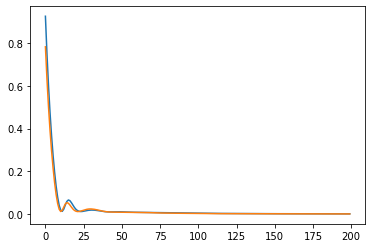

'\n0.0011 0.000733 LSTM 5 \n0.0010 0.0011   LSTM 28\n0.0011 0.0015   SimpleRNN 28\n0.0009 0.0011   SimpleRNN 5\n0.0009 0.0012   GRU\n'

In [26]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

'''
0.0011 0.000733 LSTM 5 
0.0010 0.0011   LSTM 28
0.0011 0.0015   SimpleRNN 28
0.0009 0.0011   SimpleRNN 5
0.0009 0.0012   GRU
'''

In [27]:
predict = model.predict(X_test)


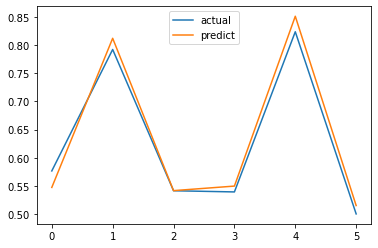

In [28]:
plt.plot(Y_test[-50:], label= 'actual') #실제와 예측이 많이 겹침 
plt.plot(predict[-50:], label='predict')
plt.legend()
plt.show()

In [29]:
print(sequence_Y[-5:]) #실제값
print(predict[-5:]) #예측값

[0.75039598 0.79234412 0.82382731 0.90017852 1.        ]
[[0.8122258 ]
 [0.54169965]
 [0.5497751 ]
 [0.8513776 ]
 [0.51522416]]


In [30]:
data_numberofhousehold = df[['영업기간']] #세대수열만 뽑기 
print(data_numberofhousehold)

                   영업기간
날짜                     
2016-01-01  3762.914616
2016-02-01  3766.710458
2016-03-01  3774.608391
2016-04-01  3768.538531
2016-05-01  3766.699783
2016-06-01  3753.306354
2016-07-01  3753.661748
2016-08-01  3764.513433
2016-09-01  3769.764364
2016-10-01  3771.518024
2016-11-01  3767.486148
2016-12-01  3769.770168
2017-01-01  3779.006714
2017-02-01  3772.753713
2017-03-01  3757.930047
2017-04-01  3748.917528
2017-05-01  3738.812845
2017-06-01  3713.560109
2017-07-01  3699.945084
2017-08-01  3683.717977
2017-09-01  3657.408221
2017-10-01  3651.971038
2017-11-01  3614.919142
2017-12-01  3605.710359
2018-01-01  3786.343284
2018-02-01  3784.731128
2018-03-01  3783.481026
2018-04-01  3777.974308
2018-05-01  3775.932772
2018-06-01  3777.049805
2018-07-01  3779.022222
2018-08-01  3771.234553
2018-09-01  3776.865887
2018-10-01  3772.776750
2018-11-01  3768.374432
2018-12-01  3771.968361
2019-01-01  3768.453017
2019-02-01  3767.821398
2019-03-01  3761.035966
2019-04-01  3755

In [31]:
minmaxscaler_numberofhousehold = MinMaxScaler()
_ = minmaxscaler.fit_transform(data_numberofhousehold) #inverse하기 위해 따로 스케일링

last28 = scaled_data[-28:] #마지막 28개 

predict_last28 = model.predict(
    last28.reshape(-1,last28.shape[0],last28.shape[1])) #array 형태로 들어가야하므로 한 차원 늘려야함. (1,28) 을 (1,1,28)로 변환

inverse_predict_last28 = minmaxscaler.inverse_transform(predict_last28) 
print(inverse_predict_last28)

[[3917.8164]]


In [32]:
#2020년 12월까지 예측해보기 (4개월)
#test data 2019년~2020.06까지
test_data = pd.read_csv('./강남구_시계열데이터_201906-202006.csv',encoding='cp949', index_col=0)
test_data.reset_index(inplace=True)
test_data.rename(columns={"index":"날짜"}, inplace=True)
print(test_data.head())
print(test_data.tail())
print(test_data.info())

        날짜     세대수  신설기업         유동인구         영업기간         폐업기간
0  00:00.0  230752   554  22250.79259  3594.025611  2003.089655
1  00:00.0  232115   633  24119.05735  3581.378018  2023.566406
2  00:00.0  232115   560  22491.04421  3574.508126  2413.050314
3  00:00.0  232115   475  21263.60123  3569.802244  2177.564516
4  00:00.0  232981   571  23174.88292  3553.804753  2155.637795
         날짜     세대수  신설기업         유동인구         영업기간         폐업기간
8   00:00.0  233624   652  19567.56577  3577.471815  2239.739910
9   00:00.0  233624   656  14747.26045  3591.732841  2535.193146
10  00:00.0  233484   596  16036.46914  3607.875615  2697.768116
11  00:00.0  233484   573  16843.64516  3623.287137  2686.819095
12  00:00.0  233484   723  18869.93210  3636.262083  2263.010638
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      13 non-null     object 
 1   세대수     

In [33]:
test_data['날짜'] = pd.to_datetime(test_data['날짜']) #Date 열에 덮어 씌워짐 
test_data.set_index('날짜', inplace=True) #Date 열을 인덱스로 설정
print(test_data.head())

               세대수  신설기업         유동인구         영업기간         폐업기간
날짜                                                             
2020-11-09  230752   554  22250.79259  3594.025611  2003.089655
2020-11-09  232115   633  24119.05735  3581.378018  2023.566406
2020-11-09  232115   560  22491.04421  3574.508126  2413.050314
2020-11-09  232115   475  21263.60123  3569.802244  2177.564516
2020-11-09  232981   571  23174.88292  3553.804753  2155.637795


In [34]:
test_data = df[['세대수','신설기업','유동인구','영업기간', 
                                              '폐업기간']]
print(test_data.head()) 
print(test_data.tail()) 
print(test_data.info()) 
print(test_data.shape) 

KeyError: "['세대수'] not in index"

In [ ]:
#스케일링
scaled_data = minmaxscaler.fit_transform(data) #minmaxscaler 예전의 minmax로 해야함 
print(scaled_data[:6])
print(scaled_data.shape)

In [ ]:
print(scaled_data[0][0])

In [ ]:
value = minmaxscaler.inverse_transform(
    scaled_data
)
print(value[0][0])

In [ ]:
sequence_X= []
sequence_Y= []
for i in range(0, len(scaled_data) - 28): #30개에서 28뺀 값 :0~2까지 ->두번 돔 
#0~27, 1~28 이렇게 2번 돔. 마지막 날 예측: 2~29까지 돌아야함 
    _x = scaled_data[i:i+28] #i에서부터 i 5 이전까지 인덱싱 (1,2,3,4,5) 
    _y = scaled_data[i+28][3] #5개 중 종가만 맞추는거 -> 인덱싱 3번  
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)


In [ ]:
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)


#세로로 0번 인덱스끼리 하나의 데이터가 들어가야함( 가로 x )

In [ ]:
predict = model.predict(sequence_X)

In [ ]:
plt.plot(sequence_Y[-20:], label='actual')
plt.plot(predict[-20:], label='predict')
plt.legend()
plt.show()

In [ ]:
print(sequence_Y[-5:])
print(predict[-5:]) #예측 -5 : 뒤에서 5개 데이터. 최근 

In [ ]:
data_house = test_data[['세대수']] #세대수 열만 뽑기 
print(data_house)

In [ ]:
minmaxscaler_Close = MinMaxScaler()
_ = minmaxscaler.fit_transform(data_house) #inverse하기 위해 따로 스케일링

last28 = scaled_data[-28:] #마지막 28개 

predict_last28 = model.predict(
    last28.reshape(-1,last28.shape[0],last28.shape[1])) #array 형태로 들어가야하므로 한 차원 늘려야함. (1,28) 을 (1,1,28)로 변환

inverse_predict_last28 = minmaxscaler.inverse_transform(predict_last28) 
print(inverse_predict_last28)

In [ ]:
data_people = test_data[['유동인구']] #유동인구 열만 뽑기 
print(data_people)

In [ ]:
minmaxscaler_Close = MinMaxScaler()
_ = minmaxscaler.fit_transform(data_people) #inverse하기 위해 따로 스케일링

last28 = scaled_data[-28:] #마지막 28개 

predict_last28 = model.predict(
    last28.reshape(-1,last28.shape[0],last28.shape[1])) #array 형태로 들어가야하므로 한 차원 늘려야함. (1,28) 을 (1,1,28)로 변환

inverse_predict_last28 = minmaxscaler.inverse_transform(predict_last28) 
print(inverse_predict_last28)

In [ ]:
data_new_company = test_data[['신설기업']] #신설기업 열만 뽑기 
print(data_new_company)

In [ ]:
minmaxscaler_Close = MinMaxScaler()
_ = minmaxscaler.fit_transform(data_new_company) #inverse하기 위해 따로 스케일링

last28 = scaled_data[-28:] #마지막 28개 

predict_last28 = model.predict(
    last28.reshape(-1,last28.shape[0],last28.shape[1])) #array 형태로 들어가야하므로 한 차원 늘려야함. (1,28) 을 (1,1,28)로 변환

inverse_predict_last28 = minmaxscaler.inverse_transform(predict_last28) 
print(inverse_predict_last28)